In [1]:
import os
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
url = 'https://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201901&subjId=DNSC'

r = requests.get(url)
data = r.text    
soup = bs(data, "html.parser")
# print(soup)

In [3]:
allRows = soup.findAll('tr',{'align':'center'})
#allRows = soup.findAll('tr',{'class' : 'tableRow1Font'}) # why not this

tableData = []
for row in allRows:
    eachRow = []
    cells = row.findAll('td')
    for cell in cells:
        # eachRow.append(cell.getText()) # This gave everything including tags
        # eachRow.append(cell.text.strip()) # this one has unicode
        eachRow.append(str(cell.text.strip()))
    # eachRow[2] = eachRow[2][:4]    # Without this there is some noise out there
    tableData.append(eachRow)



In [4]:
labels = tableData.pop(0) # keep for later use

In [5]:
labels

['STATUS',
 'CRN',
 'SUBJECT',
 'SECT',
 'COURSE',
 'CREDIT',
 'INSTR.',
 'BLDG/RM',
 'DAY/TIME',
 'FROM / TO',
 '']

In [6]:
df = pd.DataFrame.from_records(tableData, columns=labels)
df['SUBJECT'] = df['SUBJECT'].str.replace("\n","").str.replace("\t","")
df

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,
5,OPEN,42373,DNSC6202,10,Statistics for Managers,3.00,"Khamooshi, H",DUQUES 258,W07:10PM - 09:40PM,01/14/19 - 04/29/19,
6,OPEN,47930,DNSC6209,10,Forecasting for Analytics,1.50,"Yenigun, D",DUQUES 258,R07:10PM - 09:40PM,03/18/19 - 04/29/19,
7,WAITLIST,47776,DNSC6210,10,Decision and Risk Analytics,1.50,"Delquie, P",ROME 350,T07:10PM - 09:40PM,03/18/19 - 04/29/19,
8,OPEN,45971,DNSC6210,11,Decision and Risk Analytics,1.50,"Delquie, P",DUQUES 652,F03:30PM - 06:00PM,03/18/19 - 04/29/19,
9,OPEN,45972,DNSC6211,10,Programming for Analytics,3.00,"Kanungo, S",DUQUES 258,W04:30PM - 07:00PM,01/14/19 - 04/29/19,


In [7]:
df.to_csv('DNSC_2019_course.csv')

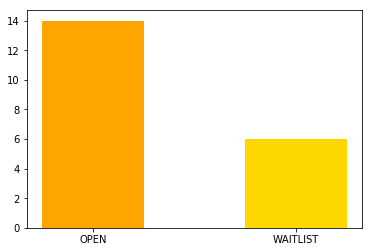

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [len(df[df.STATUS == 'OPEN']), len(df[df.STATUS == 'WAITLIST'])]
bars = df['STATUS'].unique().tolist()
y_pos = np.arange(len(bars))
width = [0.5,0.5]

# Create bars
plt.bar(y_pos, height,color=['orange', 'gold'],width=width)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
